In [4]:
# importing the require library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

# Building a Regression model using the Data for the Quiz

### Exploratory analysis
* to check if the dataset satisfy the conditions for linear Regression
* Building a Multivariate regression model
* effect of regularization
* evaluating the performances of the model using the peformances metric

In [5]:
# Reading in the dataset and displaying first few rows
df = pd.read_csv('energydata_complete(1).csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
# checking the datatypes
print("the numbers of observation and features: ", df.shape)
df.dtypes

the numbers of observation and features:  (19735, 29)


date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

The above reveals absence of missing values in the dataset

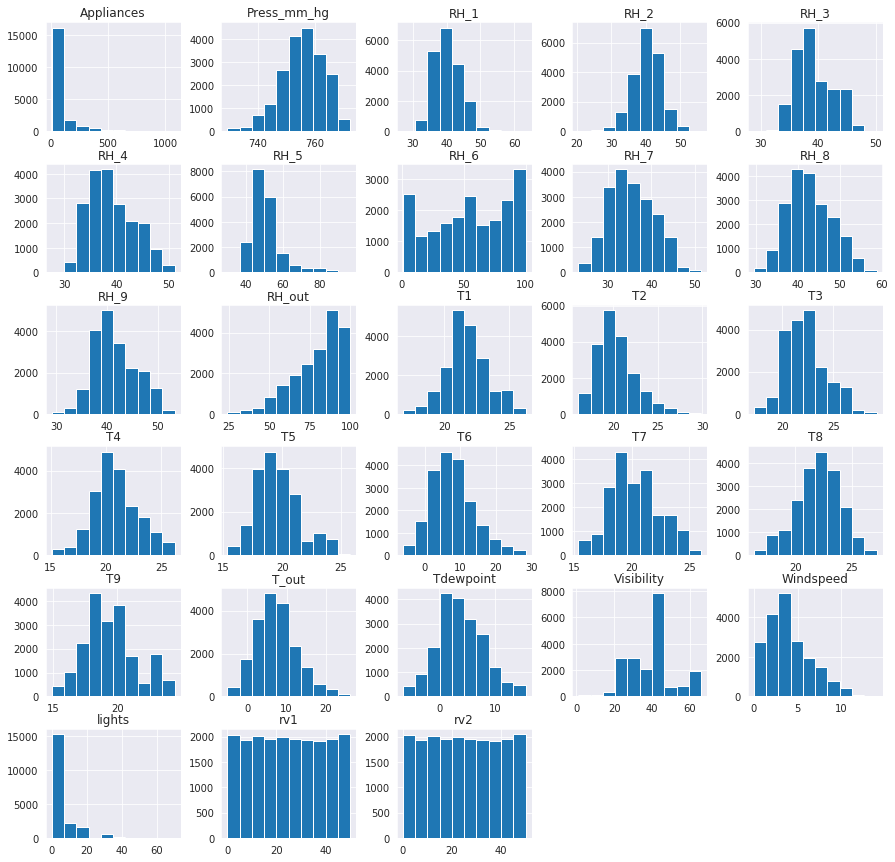

In [8]:
# checking the distribution of the dataset
df.hist(figsize=(15,15), bins=10)
plt.show()

Observation :
from the plot and the calcuting the skewness of the dataset the following features appears to be skewed and tailed heavey.
* Appliances -  it is skew to the right and heavily tailed
* lights - it is skew to the right and tailed

In [11]:
# displaying the summary statistics
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Observation:
* examining the summary statistics, particularly the means and the std, it appears that all the features are not on the same scale, thus is a need to standarized or normalize the dataset.

### Normalizing the Dataset to a common scale using the min max scaler

In [12]:
# dropping the light and date features as they are not needed to build the model
df = df.drop(columns=['date','lights'])


In [13]:
# checking to see the normalized dataset
#normalised_df.describe()

Observation : the mean and the std are now within the range of 0 and 1, this imply that the dataset have been scaled

In [14]:
from sklearn.preprocessing import MinMaxScaler

# creating an instance of the minmaxscaler
scaler = MinMaxScaler()


# Applying the transformation to the dataset
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [15]:
normalised_df.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.081958,0.517061,0.364271,0.308303,0.561170,0.421038,0.489601,0.518499,0.485143,0.407272,...,0.478234,0.512655,0.399089,0.609828,0.733558,0.288554,0.574321,0.468810,0.499742,0.499742
std,0.095818,0.169595,0.109512,0.159412,0.114438,0.166676,0.152107,0.184044,0.185289,0.176266,...,0.209647,0.171833,0.170978,0.172080,0.196067,0.175087,0.181457,0.189803,0.289984,0.289984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037383,0.419219,0.283735,0.195542,0.490299,0.298272,0.380122,0.399099,0.335894,0.281653,...,0.323621,0.386313,0.278671,0.503101,0.609649,0.142857,0.430769,0.339367,0.249895,0.249895
50%,0.046729,0.507920,0.347675,0.283499,0.563408,0.407112,0.456302,0.501502,0.458387,0.387960,...,0.468262,0.485651,0.383173,0.623256,0.785088,0.261905,0.600000,0.453997,0.497934,0.497934
75%,0.084112,0.613516,0.441519,0.392537,0.641016,0.505982,0.607260,0.630631,0.618722,0.505460,...,0.594173,0.627956,0.495445,0.735659,0.890351,0.392857,0.600000,0.595777,0.751701,0.751701
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# the train set
#features_df = normalised_df.drop('Appliances', axis=1)
features = normalised_df.drop(['Appliances'], axis=1)

# the target features
#target_Appliances = normalised_df["Appliances"]
target = normalised_df['Appliances']


### Splitting the dataset into training and testing dataset

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.3,random_state=42)

### Implementing Linear Regression

In [18]:
# importing linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# rmse = np.sqrt(mse)
# rss = np.sum(np.square(y_test - predicted_values))
# always round answer to 3 decimal place

In [19]:
# Creating an Instance of Linear Regression
lr = LR()

# Fitting the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
predicted_values = lr.predict(x_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)


0.05

In [21]:
# Predicting over the train set and calculating the performance
train_predict = lr.predict(x_train)
k = mean_absolute_error(train_predict, y_train)
print('Training Mean Absolute Error', k)


Training Mean Absolute Error 0.0502264309111538


In [22]:
# calculating the performance with the test set
test_predict = lr.predict(x_test)
k = mean_absolute_error(y_test,test_predict)
print('Test Mean Absolute Error    ', k )


Test Mean Absolute Error     0.050133623977429535


In [60]:
# function to caluculate model performance using different metric
# evaluting on training set
def train_evalution_metric():
    mse = mean_squared_error(y_train, train_predict)
    r2 = r2_score(y_train, train_predict)
    rss = np.sum(np.square(train_predict - y_train))
    rmse = np.sqrt(mean_squared_error(y_train, train_predict))
    mae = mean_absolute_error(y_train, train_predict)
    
    print("mean_square_error: ", round(mse, 3))
    print("r2_score: ", round(r2, 3))
    print("residuals_sum_of_squares: ", round(rss, 3))
    print("mean_Absolute_error", round(mae, 3))
    print("root_mean_square_error", round(rmse, 3))
    
    print('------------------------------------------------')
    
def test_evaluation_metric():
    mse = mean_squared_error(test_predict, y_test)
    r2 = r2_score(y_test, test_predict)
    rss = np.sum(np.square(test_predict - y_test))
    rmse = np.sqrt(mean_squared_error(y_test, test_predict))
    mae = mean_absolute_error(y_test, test_predict)
    
    print("mean_square_error: ", round(mse, 2))
    print("r2_score: ", round(r2, 2))
    print("residuals_sum_of_squares: ", round(rss, 2))
    print("mean_Absolute_error", round(mae, 2))
    print("root_mean_square_error", round(rmse, 2))
    
    print('------------------------------------------------')
    
    
    

In [58]:
# calulating the performance using several metrics
# for bothe the train and test set

train_evalution_metric()

mean_square_error:  0.008
r2_score:  0.145
residuals_sum_of_squares:  109.388
mean_Absolute_error 0.05
root_mean_square_error 0.089
------------------------------------------------


In [62]:
# evaluating the performance metric for the test set
test_evaluation_metric()

mean_square_error:  0.01
r2_score:  0.15
residuals_sum_of_squares:  45.35
mean_Absolute_error 0.05
root_mean_square_error 0.09
------------------------------------------------


### Parameters of Linear Regression

In [26]:
lr.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

### Plotting the coefficients


Text(0.5, 1.0, 'Coefficient plot')

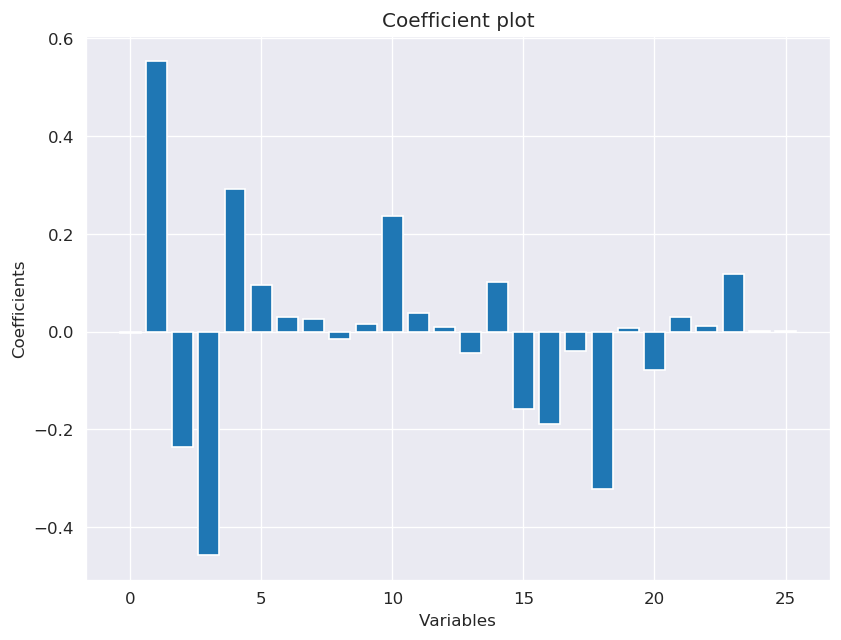

In [27]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')


Here we can see that the model depends upon some Independent variables toos much, But these coefficients are not suitable for interpretation because these are not scaled, therefore we will perform the interpretation in this note book later.


### Checking assumptions of Linear Model

In [28]:
# Arranging and Calculating the Residuals
residuals = pd.DataFrame({
    'fitted_values' : y_test,
    'predicted_values' : test_predict
})

residuals['residuals'] = residuals['fitted_values'] - residuals['predicted_values']
residuals.head()

,fitted_values,predicted_values,residuals
8980,0.028037,0.033222,-0.005185
2754,0.074766,0.244116,-0.169350
9132,0.037383,0.034000,0.003383
14359,0.037383,0.105377,-0.067994
8875,0.056075,0.023360,0.032715


In [29]:
residuals.shape

(5921, 3)

## 1. Testing for Linearity Assumption
Linearity: assumes that there is a linear relationship between the predictors and the response variable. if not either a quadratic term or another algorithm should be used.

/home/lawani/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


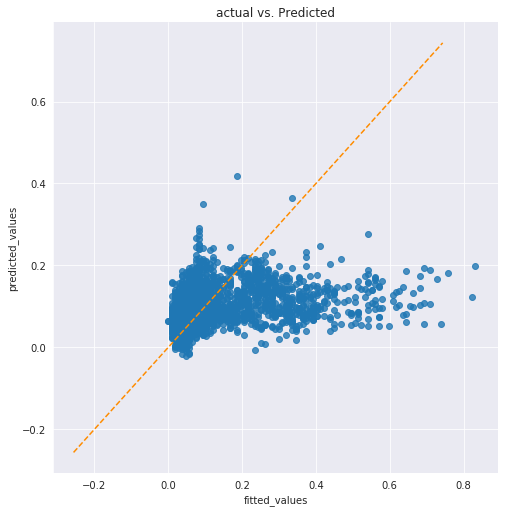

In [30]:
#plt.scatter(x='predicted_values', y='fitted_values', data=residuals)
#plt.xlabel('fitted values')
#plt.ylabel('predicted values')
sns.lmplot(x='fitted_values', y='predicted_values', data=residuals, fit_reg=False, size=7)
 # Plotting the diagonal line
line_coords = np.arange(residuals.min().min(), residuals.max().max())
plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
plt.title('actual vs. Predicted')
      
plt.show()

observation: 
* there appears to be no linear relationship between the actual values and the predicted values, hence it violate the linearity condition.

## Plotting residual curve( is there constant Variance or Homoscedastic

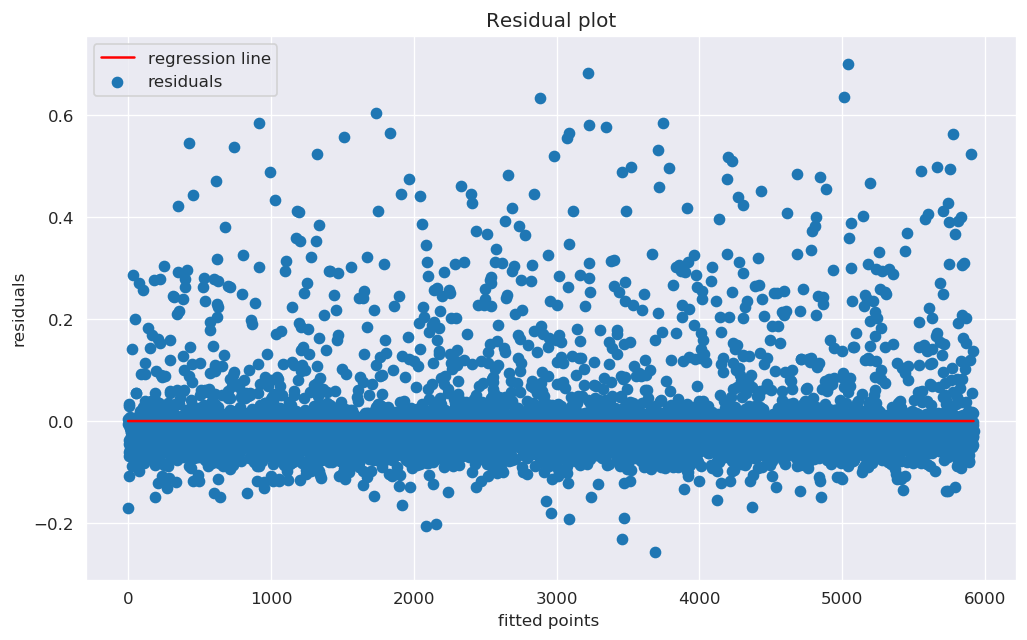

In [31]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,5921)
k = [0 for i in range(0,5921)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
#plt.ylim(-4000, 4000)
plt.legend()

###  Checking Distribution of Residuals

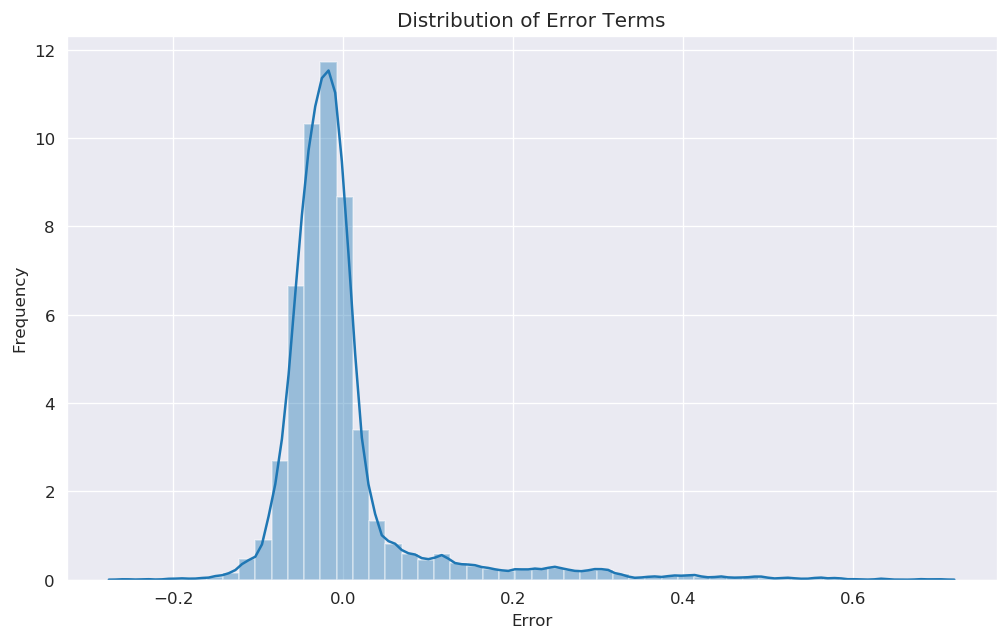

In [32]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
sns.distplot(residuals.residuals, bins = 50)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors.

let check again using the QQ-plot to check if the data is normally distibuted

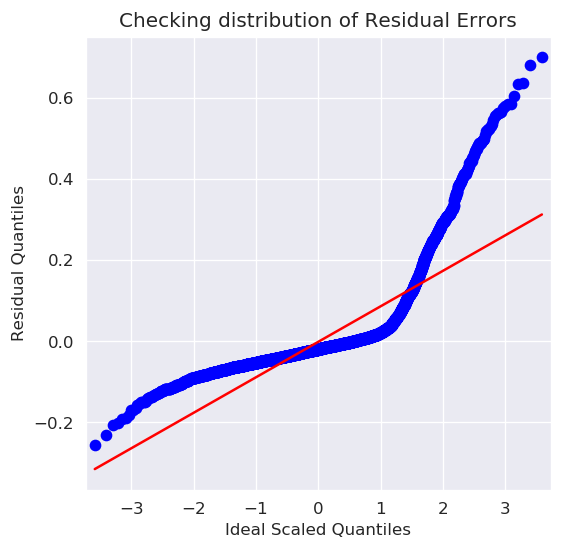

In [33]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The residuals are does not satisfy the normal distribution condition

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


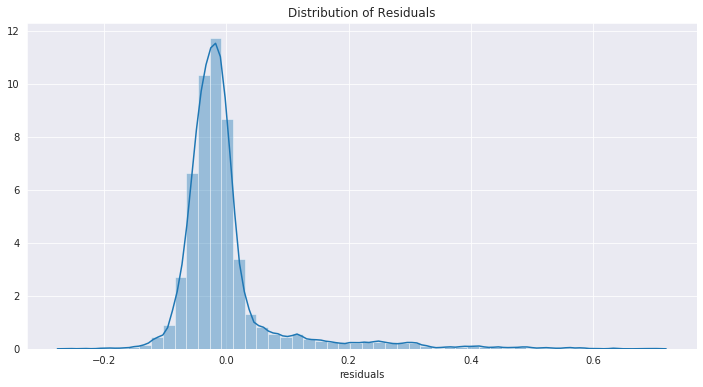


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [34]:
from statsmodels.stats.diagnostic import normal_ad
print('Assumption 2: The error terms are normally distributed', '\n')
    
# the Anderson-Darling test

    
print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(residuals['residuals'])[1]
p_value_thresh=0.05
print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')
    
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals['residuals'])
plt.show()
    
print()
if p_value > p_value_thresh:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')
    print()
    print('Confidence intervals will likely be affected')
    print('Try performing nonlinear transformations on variables')

# Variance Inflation Factor (VIF) - Testing for multi colinearity

In [35]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index =df.columns)
VIF

/home/lawani/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Appliances        2.235394
T1             3603.963433
RH_1           1686.115195
T2             2509.224150
RH_2           2201.961132
T3             1275.121206
RH_3           1572.260949
T4              933.194188
RH_4           1358.446760
T5             1187.571135
RH_5             45.101062
T6               89.578439
RH_6             40.374039
T7             1613.451165
RH_7            519.313899
T8              980.749918
RH_8            575.675844
T9             2537.681817
RH_9            637.818843
T_out           400.733279
Press_mm_hg    2086.286082
RH_out         1298.503281
Windspeed         5.257515
Visibility       12.035091
Tdewpoint       132.561481
rv1                    inf
rv2                    inf
dtype: float64

Observation:
* it appears there is presence of correlation between the predictors, it violiate this assumption

### Testing for Autocorrelation of error terms

In [66]:
from statsmodels.stats.stattools import durbin_watson
print('Assumption 4: No Autocorrelation', '\n')
    
# Calculating residuals for the Durbin Watson-tests
    

print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(residuals['residuals'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9923993039999293
Little to no autocorrelation 

Assumption satisfied


Testing the Dataset on the linear model Assumption, the dataset seems to violate most the assumption

In [38]:
# To check for multicolinearity
corr = df.corr()
cm = sns.light_palette("green", as_cmap=True)
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(3)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1,0.0554,0.086,0.12,-0.0605,0.0851,0.0363,0.0403,0.017,0.0198,0.00695,0.118,-0.0832,0.0258,-0.0556,0.0396,-0.094,0.01,-0.0515,0.0992,-0.0349,-0.152,0.0871,0.00023,0.0154,-0.0111,-0.0111
T1,0.0554,1,0.164,0.837,-0.00251,0.892,-0.0286,0.877,0.0979,0.885,-0.0148,0.655,-0.615,0.839,0.135,0.825,-0.00644,0.845,0.0718,0.683,-0.151,-0.345,-0.0877,-0.0762,0.571,-0.0062,-0.0062
RH_1,0.086,0.164,1,0.27,0.798,0.253,0.845,0.106,0.88,0.206,0.303,0.316,0.245,0.0214,0.801,-0.0301,0.736,0.115,0.764,0.341,-0.294,0.274,0.205,-0.0211,0.639,-0.000699,-0.000699
T2,0.12,0.837,0.27,1,-0.166,0.735,0.121,0.762,0.232,0.721,0.0296,0.801,-0.58,0.664,0.229,0.578,0.0685,0.676,0.157,0.792,-0.133,-0.505,0.0525,-0.0697,0.583,-0.0111,-0.0111
RH_2,-0.0605,-0.00251,0.798,-0.166,1,0.137,0.678,-0.0473,0.721,0.11,0.25,-0.00967,0.39,-0.0514,0.691,-0.041,0.68,0.0545,0.676,0.0337,-0.256,0.585,0.0692,-0.00537,0.499,0.00627,0.00627
T3,0.0851,0.892,0.253,0.735,0.137,1,-0.0112,0.853,0.123,0.888,-0.0664,0.687,-0.648,0.847,0.173,0.795,0.0444,0.901,0.135,0.699,-0.19,-0.282,-0.101,-0.102,0.646,-0.00519,-0.00519
RH_3,0.0363,-0.0286,0.845,0.121,0.678,-0.0112,1,-0.14,0.899,-0.0501,0.375,0.0768,0.515,-0.25,0.833,-0.283,0.829,-0.195,0.834,0.118,-0.233,0.356,0.263,0.017,0.414,-0.000477,-0.000477
T4,0.0403,0.877,0.106,0.762,-0.0473,0.853,-0.14,1,-0.0487,0.872,-0.0765,0.652,-0.703,0.878,0.0435,0.796,-0.0952,0.889,-0.0255,0.663,-0.0753,-0.389,-0.186,-0.105,0.519,-0.00181,-0.00181
RH_4,0.017,0.0979,0.88,0.232,0.721,0.123,0.899,-0.0487,1,0.0918,0.353,0.259,0.392,-0.131,0.894,-0.167,0.847,-0.0445,0.857,0.293,-0.251,0.337,0.3,0.00264,0.617,-0.00179,-0.00179
T5,0.0198,0.885,0.206,0.721,0.11,0.888,-0.0501,0.872,0.0918,1,0.0328,0.629,-0.632,0.871,0.149,0.825,0.0164,0.911,0.0723,0.651,-0.171,-0.274,-0.145,-0.0842,0.588,-0.00549,-0.00549


# Regularization

In [70]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
ridge_predict = ridge_reg.predict(x_test)

In [68]:
rmse = np.sqrt(mean_squared_error(y_test, ridge_predict))
round(rmse,3)

0.088

In [71]:
mse = mean_squared_error(ridge_predict, y_test)
r2 = r2_score(y_test, ridge_predict)
rss = np.sum(np.square(ridge_predict - y_test))
rmse = np.sqrt(mean_squared_error(y_test, ridge_predict))
mae = mean_absolute_error(y_test, ridge_predict)
    
print("mean_square_error: ", round(mse, 3))
print("r2_score: ", round(r2, 3))
print("residuals_sum_of_squares: ", round(rss, 3))
print("mean_Absolute_error", round(mae, 3))
print("root_mean_square_error", round(rmse, 3))
    
print('------------------------------------------------')
    

mean_square_error:  0.008
r2_score:  0.149
residuals_sum_of_squares:  45.368
mean_Absolute_error 0.05
root_mean_square_error 0.088
------------------------------------------------


In [72]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
lasso_predict = lasso_reg.predict(x_test)

In [73]:
mse = mean_squared_error(lasso_predict, y_test)
r2 = r2_score(y_test, lasso_predict)
rss = np.sum(np.square(lasso_predict - y_test))
rmse = np.sqrt(mean_squared_error(y_test, lasso_predict))
mae = mean_absolute_error(y_test, lasso_predict)
    
print("mean_square_error: ", round(mse, 2))
print("r2_score: ", round(r2, 2))
print("residuals_sum_of_squares: ", round(rss, 2))
print("mean_Absolute_error", round(mae, 2))
print("root_mean_square_error", round(rmse, 2))
    
print('------------------------------------------------')
    
    

mean_square_error:  0.01
r2_score:  0.03
residuals_sum_of_squares:  51.85
mean_Absolute_error 0.06
root_mean_square_error 0.09
------------------------------------------------


### Comparing the effects of Regularization


In [74]:
def get_weights_df(model, feat, col_name):
    # this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features',col_name]
    weights_df[col_name].round(3)
    return weights_df



In [75]:
linear_model_weights = get_weights_df(lr, x_train, 'Linear_Model_Weights')
ridge_weights_df = get_weights_df(ridge_reg,x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train,'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [76]:
final_weights

,Features,Linear_Model_Weights,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000
